## 1.2 Primer: statistika temperatur na severu

Naložimo podatke o dnevnih temperaturah v Stockholmu.

In [1]:
import numpy as np

data = np.loadtxt('podatki/stockholm.csv', delimiter=",", skiprows=1)

##### Odgovor 1-2-1

In [2]:
data[(data[:, 0] == 1817) * (data[:, 1] == 12) * (data[:, 2] == 5), :]

array([[ 1817. ,    12. ,     5. ,    -5.8]])

##### Odgovor 1-2-2

In [3]:
np.mean(data[(data[:, 1] == 1), 3])

-3.0447656725502132

##### Odgovor 1-2-3

In [4]:
odkloni = [(np.std(data[(data[:, 1] == mesec), 3]), mesec) for mesec in range(1, 13)]
odkloni

[(4.9892658658329561, 1),
 (5.0903907687662713, 2),
 (4.2923064618199263, 3),
 (3.76783651629394, 4),
 (4.029747854809286, 5),
 (3.5320797349808082, 6),
 (2.995916472129954, 7),
 (2.8473127640895139, 8),
 (3.0389674027350599, 9),
 (3.4875394481813999, 10),
 (3.8200293557907226, 11),
 (4.5026210415550008, 12)]

In [5]:
max(odkloni)

(5.0903907687662713, 2)

Največji odklon znaša 5.1 C, pojavi se v februarju.

##### Odgovor 1-2-4

In [6]:
povprečja = []
for leto in range(1800, 2012):
    for mesec in range(1, 13):
        t = np.mean(data[(data[:, 1] == mesec) * (data[:, 0] == leto), 3])
        povprečja.append((t, (leto, mesec)))
max(povprečja)

(21.532258064516132, (1994, 7))

##### Odgovor 1-2-5

In [7]:
# Izračunajmo povprečno temperaturo za vsako leto posebej 
letna_povprečja = dict()

for leto in range(1800, 2012):
    # Uporabimo pogojno naslavljanje polja
    letna_povprečja[leto] = data[data[:, 0] == leto, 3].mean()

In [8]:
# Izpiši vsako leto, ki ima večjo povprečno temperaturo od prejšnjega
leto_t = sorted(letna_povprečja.items())
večji_od_lani = [leto_t[i][0] for i in range(1, len(leto_t)) if leto_t[i-1][1] < leto_t[i][1]]
večji_od_lani[-10:]  # izpišimo le nekaj letnic

[1992, 1994, 1997, 1999, 2000, 2002, 2005, 2006, 2008, 2011]

In [9]:
# Poišči 10 najtoplejših let
t_leto = sorted(((t, leto) for leto, t in leto_t))
t_leto[-10:]

[(8.2189041095890421, 1934),
 (8.2657534246575342, 1999),
 (8.3997260273972589, 1990),
 (8.4134246575342466, 1822),
 (8.4797260273972608, 1975),
 (8.4808219178082194, 1989),
 (8.4882191780821916, 2006),
 (8.4978142076502738, 2000),
 (8.5330601092896181, 2008),
 (8.5394520547945199, 2011)]

##### Odgovor 1-2-6

In [10]:
% matplotlib inline
import matplotlib.pyplot as plt

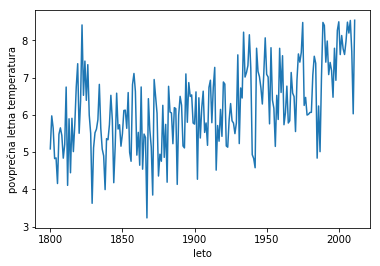

In [11]:
# Pomagaj si s letna_povprečja.
# Os x: leto
# Os y: povprečna letna temperatura

plt.figure()

# Narišimo izvirne podatke
leta, temperature = zip(*sorted(letna_povprečja.items()))
plt.plot(leta, temperature)

# Vedno označimo osi.
plt.xlabel("leto")  
plt.ylabel("povprečna letna temperatura")
plt.show()